# Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
plt.style.use('ggplot')

# Printing

In [59]:
h1 = np.random.normal()
h2 = np.random.normal()
#print it rounded to two decimal places
print("the answer is h1={:.2f} h2={:.2f}".format(h1,h2))
# add a line break in
print("the answer to question 1 is h1={:.2f} \nthe answer to question 2 is h2={:.2f}".format(h1,h2))

the answer is h1=-0.04 h2=-1.00
the answer to question 1 is h1=-0.04 
the answer to question 2 is h2=-1.00


# Plotting with matplotlib

In [4]:
def fixPlot():#this is a function for formatting the plot to be called after data is added
    plt.legend();plt.ylim(0,plt.ylim()[1]);plt.xlim(0,plt.xlim()[1]);

Text(0, 0.5, '$')

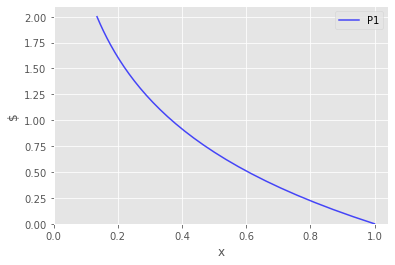

In [5]:
ps = np.linspace(0,2,30) #prices
xs1 = np.exp(-ps) #resulting demand from x(p)=e^-p

#plot inverse demand functions
plt.plot(xs1,ps,color='blue',label='P1',alpha=0.7)
fixPlot();
plt.xlabel('x')
plt.ylabel('$')

# Pandas basics

In [6]:
#make a DataFrame
N = 50
df = pd.DataFrame({'A': np.random.normal(0,1,N),'B':np.random.beta(1,1,N), 'x': np.linspace(0,5,N)})
df.head()

# add a column
df['C'] = np.random.normal(.5,1,N)

#drop a column
df = df.drop('B',axis=1)

#filter the rows where A is positive
df = df[df.A>=0]
df.head()

,A,x,C
0,1.420383,0.000000,0.404465
1,0.366108,0.102041,1.572103
4,0.679788,0.408163,-0.161243
6,0.777114,0.612245,1.433935
7,0.978618,0.714286,1.314220


## Scatter plot from pandas dataframe

Text(0, 0.5, 'draw')

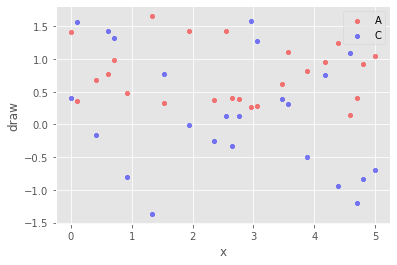

In [7]:
# plot as scatter
ax = df.plot('x','A',kind='scatter',color='red',alpha=0.5,label='A') #make sure to declare a label
df.plot('x','C',kind='scatter', ax=ax,color='blue',alpha=0.5,label='C')
ax.legend() #show a legend
ax.set_xlabel("x") #set the xlabel
ax.set_ylabel("draw") #set the y label

In [8]:
# iterate an operation over rows
#this is too simple to do in this way really but you get the gist
df[['result1','result2']] = df.apply(lambda row: [row.A*2,row.C/2], result_type='expand',axis=1) 
df.head()

,A,x,C,result1,result2
0,1.420383,0.000000,0.404465,2.840766,0.202233
1,0.366108,0.102041,1.572103,0.732216,0.786051
4,0.679788,0.408163,-0.161243,1.359576,-0.080621
6,0.777114,0.612245,1.433935,1.554228,0.716968
7,0.978618,0.714286,1.314220,1.957235,0.657110


# Unconstrained Maximization

You have a demand function 
$$X(p) = 10 - 2p,$$
where \(p\) is price. And total cost function
$$TC(x) = 2 + 1.5x.$$

You want to maximize profit.

So the profit-maximizing quantity is 3.50
 and the profit-maximizing price is 3.2


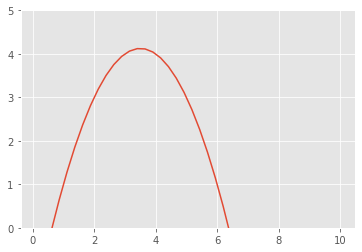

In [9]:
#start out by creating the functions
X = lambda p: 10 - 2*p #demand
P = lambda x: .5*(10-x) #inverse demand, with x as demand
TC = lambda x: 2+1.5*x #total cost
TR = lambda x: x*P(x) #total revenue
π = lambda x: TR(x) - TC(x) #profit

# now plot
xs = np.linspace(.1,10,40)
πs = π(xs)
plt.plot(xs,πs)
plt.ylim(0,5)

#now calculcate where the profit is maximized by minimumizing the *negative* of profit
res = opt.minimize(lambda x: -π(x),x0=3).x[0]
# print(res)
print("So the profit-maximizing quantity is {:.2f}\n and the profit-maximizing price is {:.2}".format(res,P(res)))

# Constrained Maximization

In this problem, we have an inverse demand function, and we want to maximize revenue subject to the condition that profit $\pi$ is at least $\pi_{\min}$.

In [55]:
π_min = 0.3
P = lambda x: 3 - 2.5*x
TR = lambda x: P(x)*x
c = .2 #marginal cost/variable cost per ride
C = lambda x: c*x
π = lambda x: TR(x) - C(x)


def fun(x):
    x = x[0]
    return np.array([
        π(x)- π_min
    ])

constraints = {'type': 'ineq', 'fun': fun}
res = opt.minimize(lambda x: -TR(x[0]), x0=(1.0), constraints=constraints)
xstar = res.x[0]
print("The optimal values are x={:.2f}, P={:.2f}, π={:.2f}, TR={:.2f}".format(xstar,P(xstar),π(xstar),TR(xstar)))

The optimal values are x=0.60, P=1.50, π=0.78, TR=0.90


# Root finding

Suppose you want to solve the equation $$x e^x = 2x + 1.$$

Rewrite it as $$x e^x - 2x - 1=0$$ and seek the root.

the root is 1.08
-0.6715530942502677


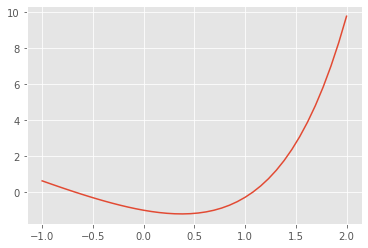

In [57]:
f = lambda x: x*np.exp(x) - 2*x - 1

#plot it to get an idea
xs = np.linspace(-1,2,40)
fs = f(xs)
plt.plot(xs,fs)

#from the plot we can see that there is a root around 1. i want to see that one.
res = opt.root_scalar(f,bracket=[.1,1.5]) #the two points of the bracket must give f(x) on opposite sides of zero (one positive, one negative)
print("the root is {:.2f}".format(res.root))

#it may also be convenient to use the general root function like this
res = opt.root(lambda x: f(x[0]),x0=(.1)).x[0] #note this is set up for multiple variables so you need .x[0]
print(res)
# print("the root is {:.2f}".format(res.root))

# Classes

In [60]:
class Line:
    def __init__(self,intercept,slope):
        self.intercept=intercept
        self.slope= slope
        
    def value_at_x(self,x):
        return self.intercept + self.slope*x

L1 = Line(1,3)
L2 = Line(-2,-1)
print(L1.value_at_x(3))
print(L2.value_at_x(3))

10
-5


# Integration

Suppose you want to integrate $x^2$ from 1 to 3.

In [64]:
from scipy.integrate import quad
quad(lambda x: x**2,1,3)[0]

8.666666666666668

# Ternary operator

In [65]:
testFun = lambda a,b: a if (a>b) else -a 
print(testFun(6,7))
print(testFun(7,5))

-6
7


# Vectorization

To make many functions work row-by-row, such as functions with a ternary operators, you have to **vectorize** them.

In [71]:
As,Bs = np.random.normal(size=5),np.random.normal(size=5)
testFun(As,Bs)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
#here we import vectorize from numpy, similar to df.apply
from numpy import vectorize
np.vectorize(testFun)(As,Bs)

array([0.07466845, 0.58765486, 0.33845703, 1.06453821, 1.69045363])